In [205]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [206]:
df = pd.read_csv('/content/2357.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,273.5,274.0,269.0,270.0,180.993896,1300586
1,2017-12-04,270.0,271.0,267.5,269.0,180.323547,992636
2,2017-12-05,269.0,269.0,267.5,268.5,179.988373,1018041
3,2017-12-06,270.5,270.5,266.5,269.5,180.658722,1181673
4,2017-12-07,269.5,269.5,265.0,265.0,177.642166,934593
...,...,...,...,...,...,...,...
1338,2023-06-07,313.0,316.0,313.0,314.5,314.500000,1236970
1339,2023-06-08,313.0,316.5,312.0,314.0,314.000000,1698649
1340,2023-06-09,316.5,316.5,314.0,315.0,315.000000,1426649
1341,2023-06-12,316.0,325.0,316.0,324.5,324.500000,3596154


In [207]:
# Extract the input features (X) and the target variable (y)
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

In [208]:
train_s = int(X.shape[0]*0.6)
test_s = int(X.shape[0]*0.3)
val_s = int(X.shape[0]*0.1)

In [209]:
X_train = X[0:train_s, :]
X_test = X[train_s:train_s+test_s,:]
X_val = X[train_s+test_s:train_s+test_s+val_s,:]

In [210]:
y_train = y[ 0:train_s]
y_test = y[train_s:train_s+test_s]
y_val = y[train_s+test_s:train_s+test_s+val_s]

In [211]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [212]:
error = [mean_squared_error(y_test,y_pred) for y_pred in model.staged_predict(X_test)]
best_samples_estimators = np.argmin(error)

In [213]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=best_samples_estimators, learning_rate=0.1, random_state=42)

# preTrain the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=28, random_state=42)

In [214]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [215]:
# Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_val_pred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
valid_mae = np.mean(np.abs(y_val_pred - y_val))
test_mae = np.mean(np.abs(y_test_pred - y_test))
valid_mape = np.mean(np.abs((y_val_pred - y_val) / y_val))
test_mape = np.mean(np.abs((y_test_pred - y_test) / y_test))

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 39.3191543264005
Testing RMSE: 17.17452477548336
Validation MAE: 38.75184703104951
Testing MAE: 11.429179984995038
Validation MAPE: 0.14026148595065768
Testing MAPE: 0.037034404173676636


In [216]:
print("R2 score",model.score(X_train, y_train))

R2 score 0.9957039602545469


In [217]:
next_day_features = (df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].iloc[-1]).values.reshape(1, -1)

In [218]:
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(next_day_features)
    predictions.append(next_day_prediction)
    next_day_features[0, :-1] = next_day_features[0, 1:]
    next_day_features[0, -1] = next_day_prediction

print("The next 30 days:\n", predictions)

The next 30 days:
 [array([338.57586744]), array([337.62992429]), array([343.20331806]), array([354.61578764]), array([351.96233172]), array([349.41069799]), array([349.41069799]), array([356.83389086]), array([361.82917317]), array([361.82917317]), array([361.82917317]), array([363.01998018]), array([363.01998018]), array([363.01998018]), array([363.01998018]), array([364.29533016]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813]), array([366.67596813])]


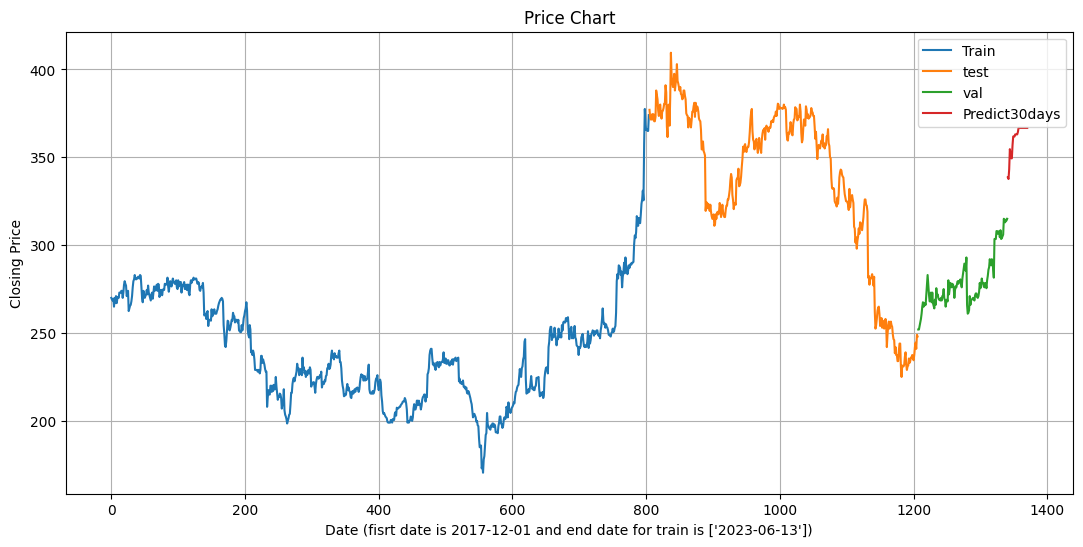

In [219]:
# Plot the price chart
plt.figure(figsize=(13, 6))
train = pd.RangeIndex(start=0, stop=train_s, step=1)
plt.plot(train,y_train)
test = pd.RangeIndex(start=train_s, stop=train_s+test_s, step=1)
plt.plot(test,y_test)
val = pd.RangeIndex(start=train_s+test_s, stop=train_s+test_s+val_s, step=1)
plt.plot(val,y_val)
test_data_index = pd.RangeIndex(start=train_s+test_s+val_s, stop=train_s+test_s+val_s+30, step=1)
plt.plot(test_data_index,predictions)
plt.xlabel('Date (fisrt date is {0} and end date for train is {1})'.format(df['Date'][0],df['Date'][-1:,].values))
plt.ylabel('Closing Price')
plt.title('Price Chart')
plt.grid(True)
plt.legend(['Train','test','val','Predict30days'])
plt.show()